# Data Visualization

Although this is not the main objective of this project, our group decided to conduct a brief data visualization on this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
dataset = pd.read_csv('../data/preprocessed/SPECTF_preprocessed.csv')

In [3]:
dataset.describe().style.format(precision=2).background_gradient(cmap="Blues")

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44
count,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00
mean,0.79,66.18,64.91,68.68,69.08,64.80,63.97,70.17,69.39,63.30,62.23,70.37,70.17,67.17,67.36,61.48,59.82,67.19,66.50,66.30,64.82,74.03,72.38,67.47,66.91,58.01,56.01,63.33,61.81,61.51,60.43,70.95,70.88,60.97,61.25,63.91,62.58,65.25,64.20,65.90,64.05,62.44,60.41,52.58,50.54
std,0.41,8.25,9.44,6.59,8.39,8.83,9.48,8.36,9.50,9.02,9.34,7.27,8.50,7.91,7.96,9.85,11.45,9.58,9.96,8.02,8.55,6.38,7.39,8.44,9.14,13.16,14.27,9.71,10.55,11.34,13.23,6.06,8.21,6.44,7.58,7.94,10.95,7.89,9.25,12.09,12.69,14.44,15.20,12.81,14.55
min,0.00,23.00,21.00,38.00,34.00,21.00,25.00,21.00,20.00,12.00,22.00,11.00,12.00,32.00,28.00,23.00,8.00,3.00,11.00,35.00,17.00,36.00,40.00,27.00,32.00,12.00,6.00,8.00,17.00,13.00,7.00,39.00,9.00,28.00,16.00,18.00,13.00,33.00,18.00,11.00,6.00,5.00,8.00,11.00,4.00
25%,1.00,62.00,60.00,65.00,66.00,61.00,60.00,68.00,67.00,61.00,58.00,67.00,68.00,64.00,64.00,58.00,57.00,65.00,64.00,62.00,61.00,72.00,69.00,64.00,62.50,53.00,47.50,60.00,57.00,59.00,59.00,69.00,69.00,58.00,58.00,62.00,61.00,62.00,60.00,62.50,60.00,59.50,56.00,49.00,45.00
50%,1.00,67.00,66.00,69.00,71.00,66.00,66.00,72.00,72.00,65.00,64.00,72.00,72.00,69.00,69.00,63.00,62.00,69.00,69.00,67.00,66.00,75.00,74.00,69.00,69.00,61.00,60.00,65.00,64.00,65.00,65.00,72.00,73.00,61.00,62.00,66.00,65.00,66.00,66.00,69.00,67.00,67.00,65.00,56.00,55.00
75%,1.00,71.50,71.00,73.00,74.00,70.00,70.00,75.00,75.00,68.00,68.00,75.00,76.00,72.00,73.00,68.00,67.00,73.00,73.00,72.00,70.00,78.00,78.00,73.00,73.00,66.50,65.00,69.00,68.00,68.00,68.00,75.00,75.00,65.00,65.00,68.00,69.00,71.00,71.00,73.00,72.00,72.00,70.00,61.00,60.00
max,1.00,83.00,81.00,82.00,84.00,82.00,89.00,85.00,83.00,77.00,78.00,81.00,82.00,79.00,80.00,77.00,77.00,80.00,83.00,86.00,81.00,86.00,86.00,84.00,85.00,79.00,80.00,80.00,86.00,79.00,78.00,80.00,84.00,77.00,80.00,76.00,77.00,80.00,79.00,83.00,81.00,82.00,83.00,82.00,73.00


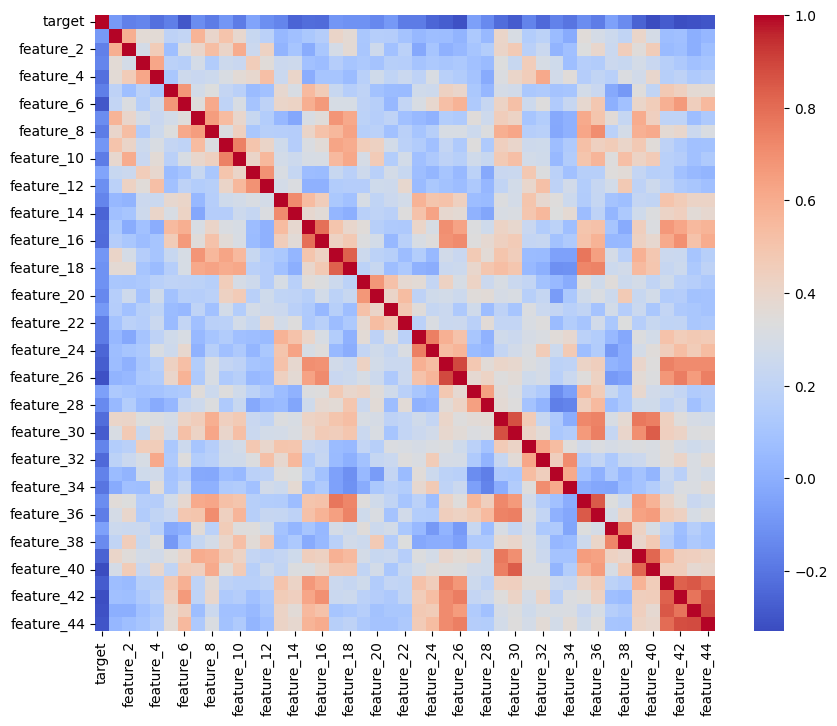

In [7]:
plt.figure(figsize=(10, 8))
matrix = dataset.corr()
sns.heatmap(matrix, cmap='coolwarm')
plt.show()

In [8]:
skewness = (
    dataset
    .skew()
    .reset_index()
    .rename(columns={"index": "variable", 0: "skewness"})
)
kurtosis = (
    dataset
    .kurtosis()
    .reset_index()
    .rename(columns={"index": "variable", 0: "kurtosis"})
)
skewness_kurtosis = pd.concat([skewness, kurtosis["kurtosis"]], axis=1)
skewness_kurtosis.round(2).style.format(precision=2).background_gradient(
    vmax=3, vmin=-1, cmap="Blues"
)

,variable,skewness,kurtosis
0,target,-1.46,0.14
1,feature_1,-1.47,4.55
2,feature_2,-1.21,2.95
3,feature_3,-0.93,1.91
4,feature_4,-1.35,2.56
5,feature_5,-1.57,4.67
6,feature_6,-1.43,3.17
7,feature_7,-2.63,10.52
8,feature_8,-2.37,7.82
9,feature_9,-2.45,8.93


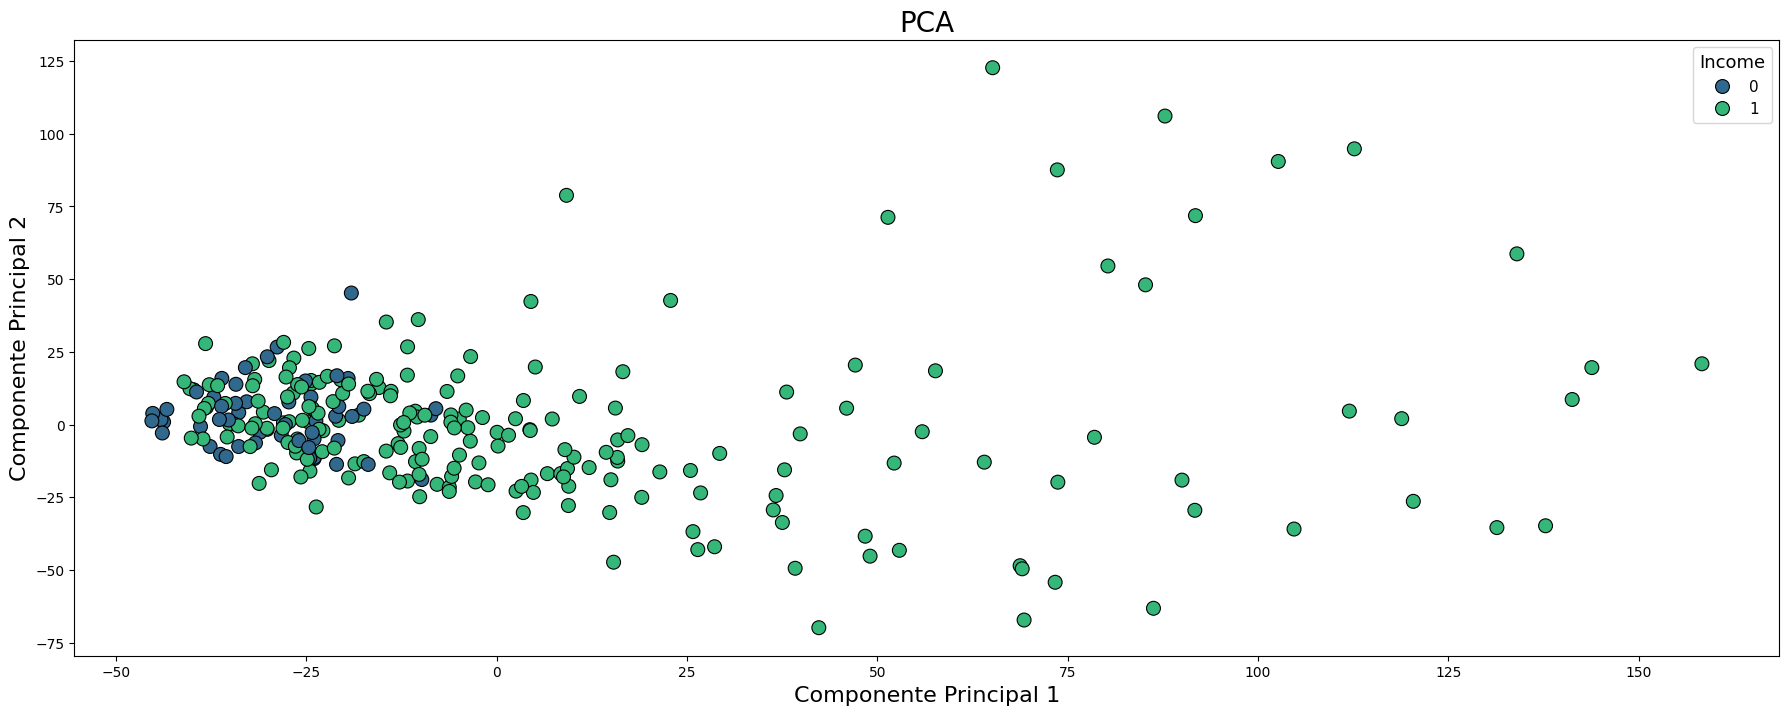

In [12]:
from os import X_OK
from sklearn.decomposition import PCA

pca = PCA(2)

pca_result = pca.fit_transform(dataset.drop(columns='target'))

dataset_pca = pd.DataFrame({
    'x': pca_result[:, 0],
    'y': pca_result[:, 1],
    'target': dataset['target']
})


fig = plt.figure(figsize=(22, 8))

sns.scatterplot(data=dataset_pca, x='x', y='y', hue='target', palette='viridis', s=100, edgecolor='k')

plt.title('PCA', fontsize=20)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)
plt.legend(title='Income', title_fontsize='13', fontsize='11')

plt.show()

In [3]:
prof_report = ProfileReport(dataset, title="Profiling Report - SPECTF dataset", minimal=True)
prof_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]